## Implement simple linear regression from scratch

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('house_prices.csv')

# Inspect the data
print(df.head())
print(df.info())

  Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type  \
0    PROP0001  3712         4          3   36        Rural         House   
1    PROP0002  1591         4          1   35       Suburb         House   
2    PROP0003  1646         4          3   20        Rural         Villa   
3    PROP0004  4814         1          2   13  City Center         Villa   
4    PROP0005   800         4          2   38       Suburb     Apartment   

      Price  
0  22260000  
1  16057500  
2  12730000  
3  50840000  
4  10650000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Proper

Intercept (b0): 3436118.7918802425
Slope (b1): 7771.692409121677
R-squared: 0.6340733925305242
MAE: 6114003.32169322
RMSE: 7648669.408676403


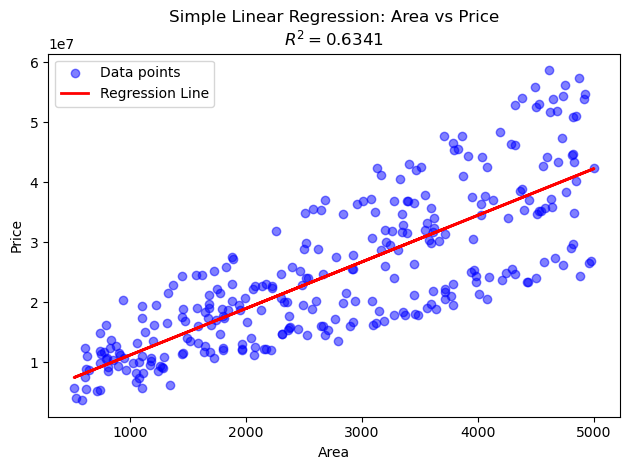

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('house_prices.csv')

# Features and target
X = df['Area'].values
y = df['Price'].values

# Simple Linear Regression from scratch (Analytical approach)
def simple_linear_regression(X, y):
    n = len(X)
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # Calculate SS_xy and SS_xx
    ss_xy = np.sum((X - x_mean) * (y - y_mean))
    ss_xx = np.sum((X - x_mean)**2)
    
    # Calculate coefficients
    b1 = ss_xy / ss_xx
    b0 = y_mean - b1 * x_mean
    
    return b0, b1

# Get coefficients
intercept, slope = simple_linear_regression(X, y)

# Predictions
y_pred = intercept + slope * X

# Calculate Metrics
y_mean = np.mean(y) # Fix: define y_mean globally for use below
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y_mean)**2)
r_squared = 1 - (ss_res / ss_tot)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Plotting
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title(f'Simple Linear Regression: Area vs Price\n$R^2 = {r_squared:.4f}$')
plt.legend()
plt.tight_layout()
plt.savefig('linear_regression_plot.png')

print(f"Intercept (b0): {intercept}")
print(f"Slope (b1): {slope}")
print(f"R-squared: {r_squared}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Intercept (b0): 3,436,118.7919
Slope (b1): 7,771.6924
R-squared: 0.6341


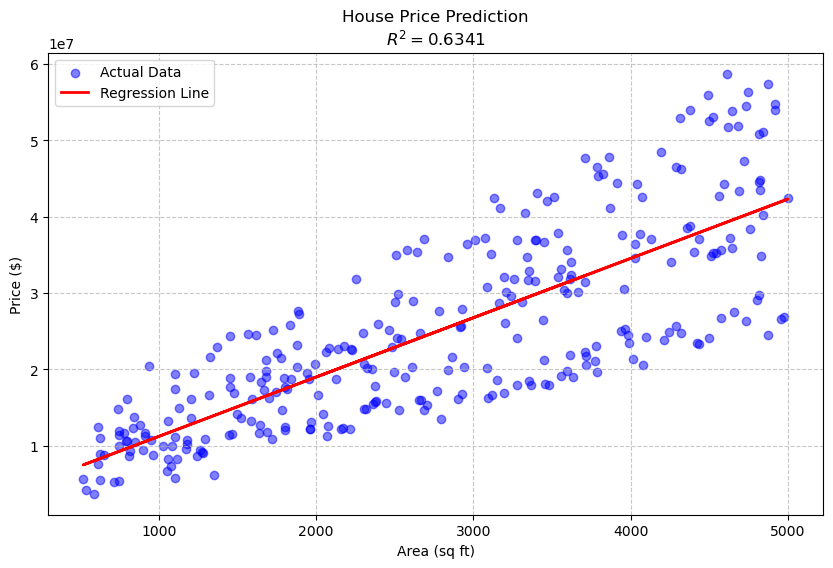

In [3]:
df = pd.read_csv('house_prices.csv')
X = df['Area'].values
y = df['Price'].values

# 2. Implementation of Simple Linear Regression from scratch
def simple_linear_regression(X, y):
    # Number of observations
    n = len(X)
    
    # Mean of X and y
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # Calculate cross-deviation (SS_xy) and squared deviation (SS_xx)
    ss_xy = np.sum((X - x_mean) * (y - y_mean))
    ss_xx = np.sum((X - x_mean)**2)
    
    # Calculate regression coefficients
    b1 = ss_xy / ss_xx
    b0 = y_mean - b1 * x_mean
    
    return b0, b1

# 3. Train the model
intercept, slope = simple_linear_regression(X, y)

# 4. Make predictions
y_pred = intercept + slope * X

# 5. Evaluate the model (R-squared)
# Recalculate y_mean in the global scope for evaluation
y_mean = np.mean(y)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y_mean)**2)
r_squared = 1 - (ss_res / ss_tot)

# 6. Output the results
print(f"Intercept (b0): {intercept:,.4f}")
print(f"Slope (b1): {slope:,.4f}")
print(f"R-squared: {r_squared:.4f}")

# 7. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title(f'House Price Prediction\n$R^2 = {r_squared:.4f}$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('corrected_regression_plot.png')

In [4]:
# Create a summary dataframe for the first 10 rows
comparison_df = pd.DataFrame({
    'Area': X[:10],
    'Actual Price': y[:10],
    'Predicted Price': y_pred[:10].round(2)
})
print(comparison_df)
comparison_df.to_csv('regression_results.csv', index=False)

   Area  Actual Price  Predicted Price
0  3712      22260000      32284641.01
1  1591      16057500      15800881.41
2  1646      12730000      16228324.50
3  4814      50840000      40849046.05
4   800      10650000       9653472.72
5  4318      24790000      36994286.61
6  2705      15375000      24458546.76
7  3128      42380000      27745972.65
8  4824      43455000      40926762.97
9  2300      24800000      21311011.33


In [5]:
X = df['Area'].values
y = df['Price'].values

# 2. Implementation from scratch
def simple_linear_regression(X, y):
    n = len(X)
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # Calculate Sum of Squares
    ss_xy = np.sum((X - x_mean) * (y - y_mean))
    ss_xx = np.sum((X - x_mean)**2)
    
    # Calculate coefficients
    slope = ss_xy / ss_xx
    intercept = y_mean - slope * x_mean
    
    return intercept, slope

# 3. Training
intercept, slope = simple_linear_regression(X, y)

# 4. Prediction
y_pred = intercept + slope * X

# 5. Evaluation (R-squared)
y_mean = np.mean(y)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y_mean)**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R-squared: {r_squared:.4f}")

Intercept: 3436118.79
Slope: 7771.69
R-squared: 0.6341


## Use scikit-learn for basic machine learning models

               Model           MSE  R2 Score
0  Linear Regression  8.454331e+12  0.940637
1      Random Forest  4.120315e+12  0.971069


<Figure size 640x480 with 0 Axes>

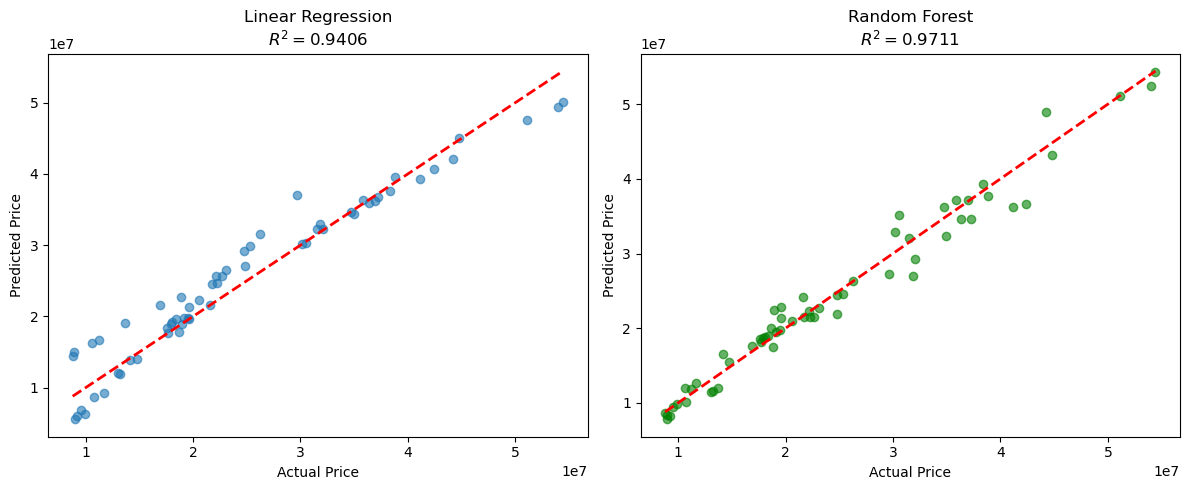

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('house_prices.csv')

# Preprocessing: Convert categorical variables to dummy variables
df_processed = pd.get_dummies(df, columns=['Location', 'Property_Type'], drop_first=True)

# Select features and target
# Dropping Property_ID as it's just an identifier
X = df_processed.drop(['Property_ID', 'Price'], axis=1)
y = df_processed['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 2. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics
results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_rf)],
    'R2 Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualization
plt.clf()
plt.figure(figsize=(12, 5))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression\n$R^2 = {results["R2 Score"][0]:.4f}$')

# Plot Random Forest results
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Random Forest\n$R^2 = {results["R2 Score"][1]:.4f}$')

plt.tight_layout()
plt.savefig('sklearn_comparison.png')

# Save predictions to CSV
test_results = pd.DataFrame({
    'Actual': y_test,
    'LR_Predicted': y_pred_lr,
    'RF_Predicted': y_pred_rf
})
test_results.to_csv('sklearn_predictions.csv', index=False)

## Split data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
# We will keep all features for the split, but we can drop the identifier 'Property_ID'
X = df.drop(columns=['Price', 'Property_ID'])
y = df['Price']

# Split the data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y back to save as CSV for the user
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save to CSV
train_df.to_csv('train_house_prices.csv', index=False)
test_df.to_csv('test_house_prices.csv', index=False)

# Displaying info about the split
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(train_df)}")
print(f"Testing samples: {len(test_df)}")

Total samples: 300
Training samples: 240
Testing samples: 60


In [8]:
# Define Features and Target
X = df.drop(columns=['Price', 'Property_ID'])
y = df['Price']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
df.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


## Evaluate model performance using basic metrics

In [10]:
# 2. Preprocess: Drop ID and encode categorical features
# We drop Property_ID as it has no predictive power
data = df.drop(columns=['Property_ID'])
# Convert 'Location' and 'Property_Type' into binary columns
data = pd.get_dummies(data, columns=['Location', 'Property_Type'], drop_first=True)

# 3. Split into features (X) and target (y)
X = data.drop(columns=['Price'])
y = data['Price']

# 4. Split into Train (80%) and Test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Generate predictions on the test set
y_pred = model.predict(X_test)

# 7. Calculate and print metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 2,188,736.34
Root Mean Squared Error (RMSE): 2,907,633.21
R-squared (R2): 0.9406


## Practice with simple prediction problems

In [11]:
# Try changing the feature from 'Area' to 'Age'
X_age = df['Age'].values
y_price = df['Price'].values

# Use the simple_linear_regression function from before
intercept, slope = simple_linear_regression(X_age, y_price)
print(f"Slope for Age: {slope}")

Slope for Age: -115566.6943440461


In [12]:
# Create a binary target
df['is_luxury'] = (df['Price'] > 30000000).astype(int)

# Hint: For classification, you would typically use Logistic Regression 
# instead of Linear Regression.

## Simple Linear Regression (Salary Prediction)

In [13]:
data = {
    "Experience": [1, 2, 3, 4, 5],
    "Salary": [30000, 35000, 40000, 45000, 50000]
}

df = pd.DataFrame(data)

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Separate feature and target
X = df[["Experience"]]   # independent variable
y = df["Salary"]         # dependent variable

# Step 2: Create model
model = LinearRegression()

# Step 3: Train model
model.fit(X, y)

# Step 4: Predict salary for new experience
predicted_salary = model.predict([[6]])

print("Predicted Salary for 6 years experience:", predicted_salary[0])

# Step 5: Evaluate model
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)

print("MAE:", mae)

Predicted Salary for 6 years experience: 55000.0
MAE: 7.275957614183426e-13


C:\Users\Naveen Reddy\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 2: Multiple Linear Regression (House Price Prediction)
Problem

 - Predict house price using area and bedrooms.

In [16]:
data = {
    "Area": [800, 1000, 1200, 1500, 1800],
    "Bedrooms": [1, 2, 2, 3, 3],
    "Price": [3000000, 4000000, 4500000, 5500000, 6000000]
}

df = pd.DataFrame(data)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features and target
X = df[["Area", "Bedrooms"]]
y = df["Price"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Evaluation
r2 = r2_score(y, y_pred)

print("Predicted Prices:", y_pred)
print("R2 Score:", r2)

Predicted Prices: [3051724.13793104 4025862.06896552 4370689.65517241 5517241.37931035
 6034482.75862069]
R2 Score: 0.9962189957652752


## 3: Simple Classification (Pass / Fail Prediction)
Problem

- Predict whether a student passes or fails based on study hours.

In [18]:
data = {
    "Study_Hours": [1, 2, 3, 4, 5, 6],
    "Pass": [0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features and target
X = df[["Study_Hours"]]
y = df["Pass"]

# Train model
model = LogisticRegression()
model.fit(X, y)

# Prediction
y_pred = model.predict(X)

# Evaluation
accuracy = accuracy_score(y, y_pred)

print("Predictions:", y_pred)
print("Accuracy:", accuracy)

Predictions: [0 0 0 1 1 1]
Accuracy: 1.0


## 4: Predict with Train-Test Split
Problem

- Use train-test split and evaluate performance.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data
X = [[1], [2], [3], [4], [5]]
y = [10, 20, 30, 40, 50]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Predicted:", y_pred)
print("RMSE:", rmse)

Predicted: [30.]
RMSE: 0.0


## Visualize model predictions and actual results

Metrics - MAE: 2,188,736.34, R2: 0.9406


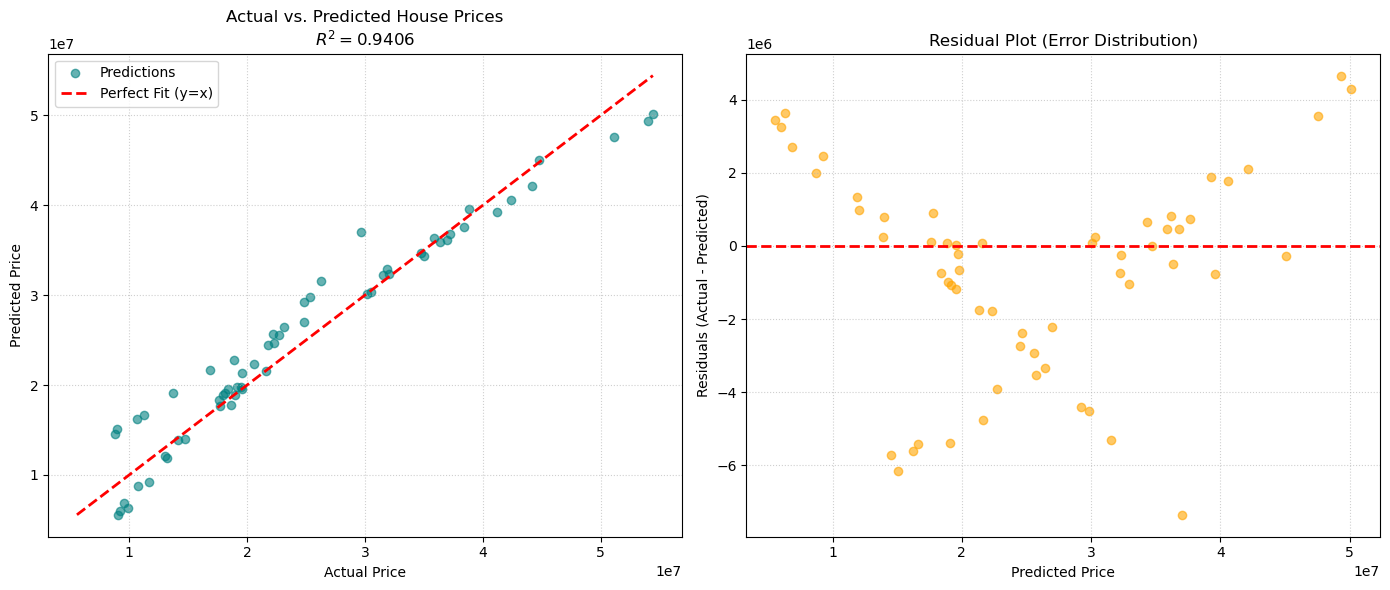

In [21]:
df = pd.read_csv('house_prices.csv')
# Preprocessing
data = df.drop(columns=['Property_ID'])
data = pd.get_dummies(data, columns=['Location', 'Property_Type'], drop_first=True)

X = data.drop(columns=['Price'])
y = data['Price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualization
plt.figure(figsize=(14, 6))

# Subplot 1: Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', label='Predictions')
# Diagonal line representing perfect prediction
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Fit (y=x)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs. Predicted House Prices\n$R^2 = {r2:.4f}$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# Subplot 2: Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Error Distribution)')
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.savefig('prediction_performance.png')

print(f"Metrics - MAE: {mae:,.2f}, R2: {r2:.4f}")